In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
%matplotlib inline

In [2]:
import itertools

In [3]:
data=pd.read_csv('F:\Henry Harvin\order_segmentation_0.0_raw.csv', sep=',')
data.shape
data.tail()

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
28096       29989     10231  29989           15       7.70        1     0   
28097       29990     10231  29990           22       8.97        7    12   
28098       29991     10231  29991           15       3.92        5    11   
28099       29997     10237  29997           54       0.00        4    17   
28100       29998     10237  29998           10       0.00        5    10   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
28096  61.32    0.00    23.34  15.34      0.0      0.0    0.0    0.0  
28097  29.74   28.72    19.52  22.02      0.0      0.0    0.0    0.0  
28098  23.38   35.70    40.92   0.00      0.0      0.0    0.0    0.0  
28099   9.25    0.00    77.48  13.27      0.0      0.0    0.0    0.0  
28100   0.00    0.00   100.00   0.00      0.0      0.0    0.0    0.0

In [4]:
data.describe()

Unnamed: 0      customer         order   total_items     discount%  \
count  28101.000000  28101.000000  28101.000000  28101.000000  28101.000000   
mean   14833.211345   4956.276147  14833.211345     33.368243      8.652148   
std     8616.515980   2873.114004   8616.515980     18.852646     14.368890   
min        0.000000      0.000000      0.000000      6.000000    -65.150000   
25%     7358.000000   2469.000000   7358.000000     21.000000      1.460000   
50%    14747.000000   4941.000000  14747.000000     30.000000      4.370000   
75%    22303.000000   7421.000000  22303.000000     42.000000     10.170000   
max    29998.000000  10237.000000  29998.000000    140.000000    100.000000   

            weekday          hour         Food%        Fresh%       Drinks%  \
count  28101.000000  28101.000000  28101.000000  28101.000000  28101.000000   
mean       3.657023     15.097078     24.538509     21.186311     24.296078   
std        2.121844      5.726237     21.085909     23.520618     21.924842   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000     11.000000      9.450000      0.000000      8.410000   
50%        3.000000     15.000000     20.780000     13.380000     19.020000   
75%        6.000000     20.000000     34.020000     37.080000     34.090000   
max        7.000000     23.000000    100.000000    100.000000    100.000000   

              Home%       Beauty%       Health%         Baby%         Pets%  
count  28101.000000  28101.000000  28101.000000  28101.000000  28101.000000  
mean      13.946777      4.997849      1.141394      8.742325      1.029049  
std       17.304589      9.983512      5.044288     20.160893      5.803979  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        8.160000      0.000000      0.000000      0.000000      0.000000  
75%       20.670000      6.570000      0.000000      2.420000      0.000000  
max      100.000000    100.000000    100.000000    100.000000    100.000000

In [5]:
data[data['discount%']<0].sort_values(by='discount%', ascending='True')

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
22336       23632      7807  23632           11     -65.15        1    10   
4358         4554      1487   4554            9     -63.64        7    13   
6854         7185      2418   7185            9     -47.26        5     8   
734           768       199    768           14     -39.84        6     8   
15261       16098      5379  16098            8     -26.15        3    13   
...           ...       ...    ...          ...        ...      ...   ...   
4836         5060      1696   5060           26      -0.34        4    11   
17039       17998      6038  17998           22      -0.33        2    23   
12898       13526      4557  13526           77      -0.19        4    12   
19520       20654      6889  20654           44      -0.04        4     0   
7846         8247      2875   8247           35      -0.03        6     9   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
22336   0.00    0.00    86.97  13.03     0.00     0.00   0.00    0.0  
4358    0.00    0.00   100.00   0.00     0.00     0.00   0.00    0.0  
6854    0.00    0.00   100.00   0.00     0.00     0.00   0.00    0.0  
734    28.97    0.00    71.03   0.00     0.00     0.00   0.00    0.0  
15261   0.00    0.00   100.00   0.00     0.00     0.00   0.00    0.0  
...      ...     ...      ...    ...      ...      ...    ...    ...  
4836   24.60    0.00    34.11  32.87     8.42     0.00   0.00    0.0  
17039   4.74    0.00    15.49   0.00     0.00     0.00  79.77    0.0  
12898  78.57    0.00    14.69   6.74     0.00     0.00   0.00    0.0  
19520  33.87    0.00    14.96  17.42    15.40    18.36   0.00    0.0  
7846   34.31   32.01     5.33   8.90     8.66     6.45   4.34    0.0  

[124 rows x 15 columns]

In [6]:
indices=[45,67,13,43]
data.iloc[indices,:]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  Food%  \
45          48         4     48           20       5.49        1    10   0.00   
67          74         4     74           15       1.70        4    21  17.76   
13          13         1     13           35      16.38        1    11  11.46   
43          46         3     46           45       0.00        1    11  28.48   

    Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
45   86.42    12.31   1.27      0.0      0.0    0.0    0.0  
67   48.90    26.50   6.84      0.0      0.0    0.0    0.0  
13   79.06     9.48   0.00      0.0      0.0    0.0    0.0  
43   58.01     8.88   4.63      0.0      0.0    0.0    0.0

In [7]:
df=data.drop(['weekday','hour','order'], axis=1)
frame=data

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=11)
pca.fit(df.values)


PCA(n_components=11)

In [9]:
def pca_results(pca, df):
    dimensions = ['dimention {}'.format(i) for i in range(1,pca.n_components_+1)]
    fig, ax = plt.subplots(figsize=(18,12))
    components = pd.DataFrame(pca.components_)
    components.plot(ax=ax, kind='bar');
    labels = [str(s) for s in df.columns]
    ax.legend(labels)
    ax.set_ylabel('Feature Weights')
    ax.set_xticklabels(dimensions, rotation=90)
    for i, ev in enumerate(np.round(pca.explained_variance_ratio_, 3)):
        ax.text(i-0.04, ax.get_ylim()[1]+0.05, ev)
    plt.show()

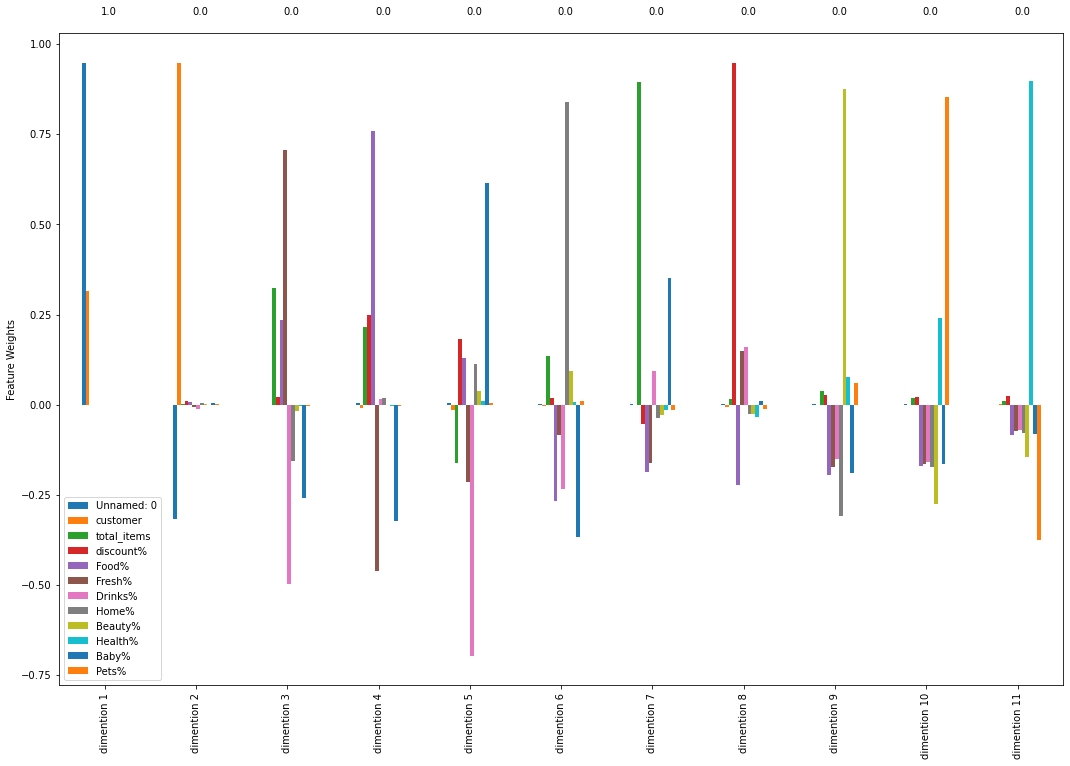

In [10]:
pca_results(pca, df)

In [11]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

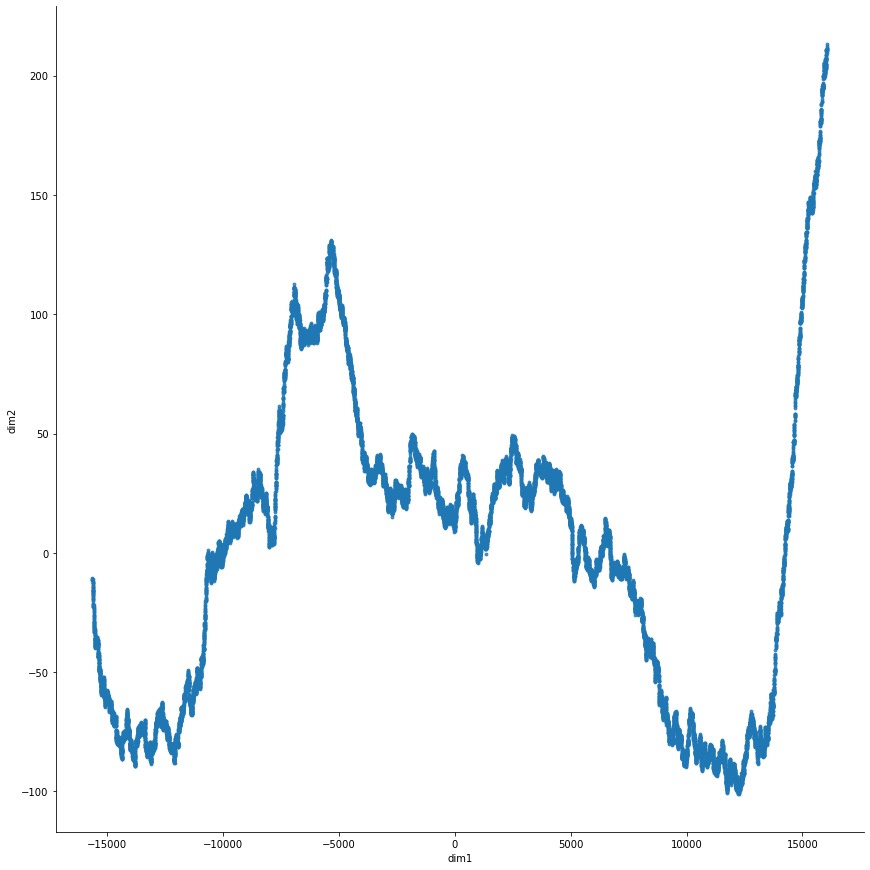

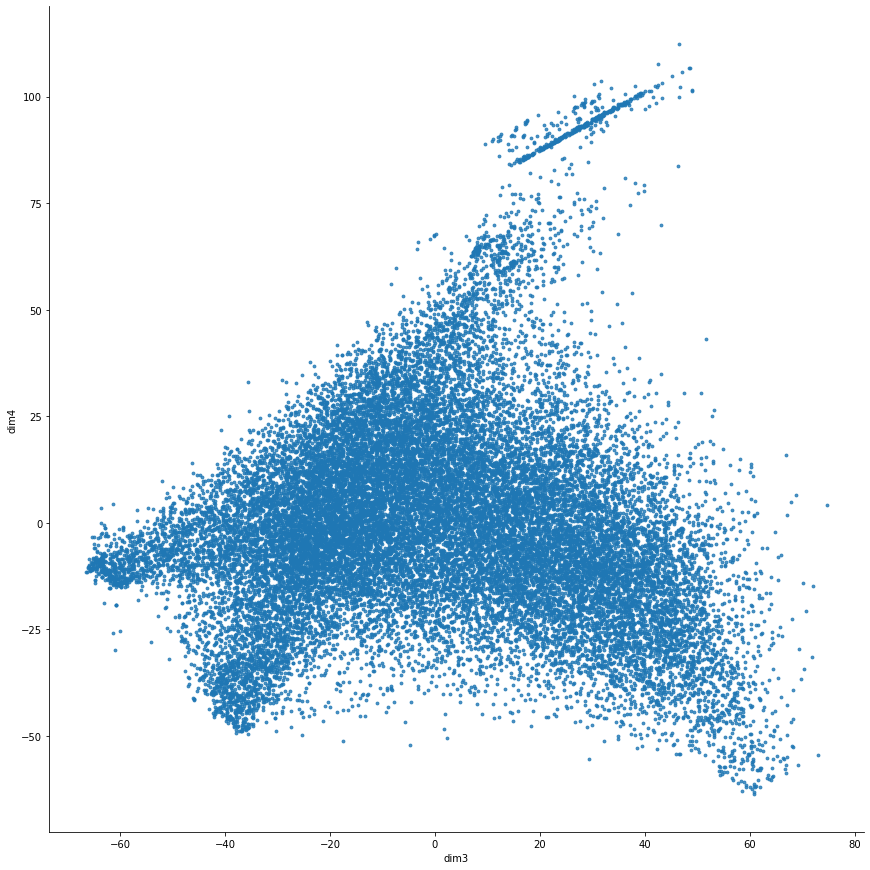

In [12]:
pca_2d_plot(pca, df)

<Figure size 1440x1440 with 0 Axes>

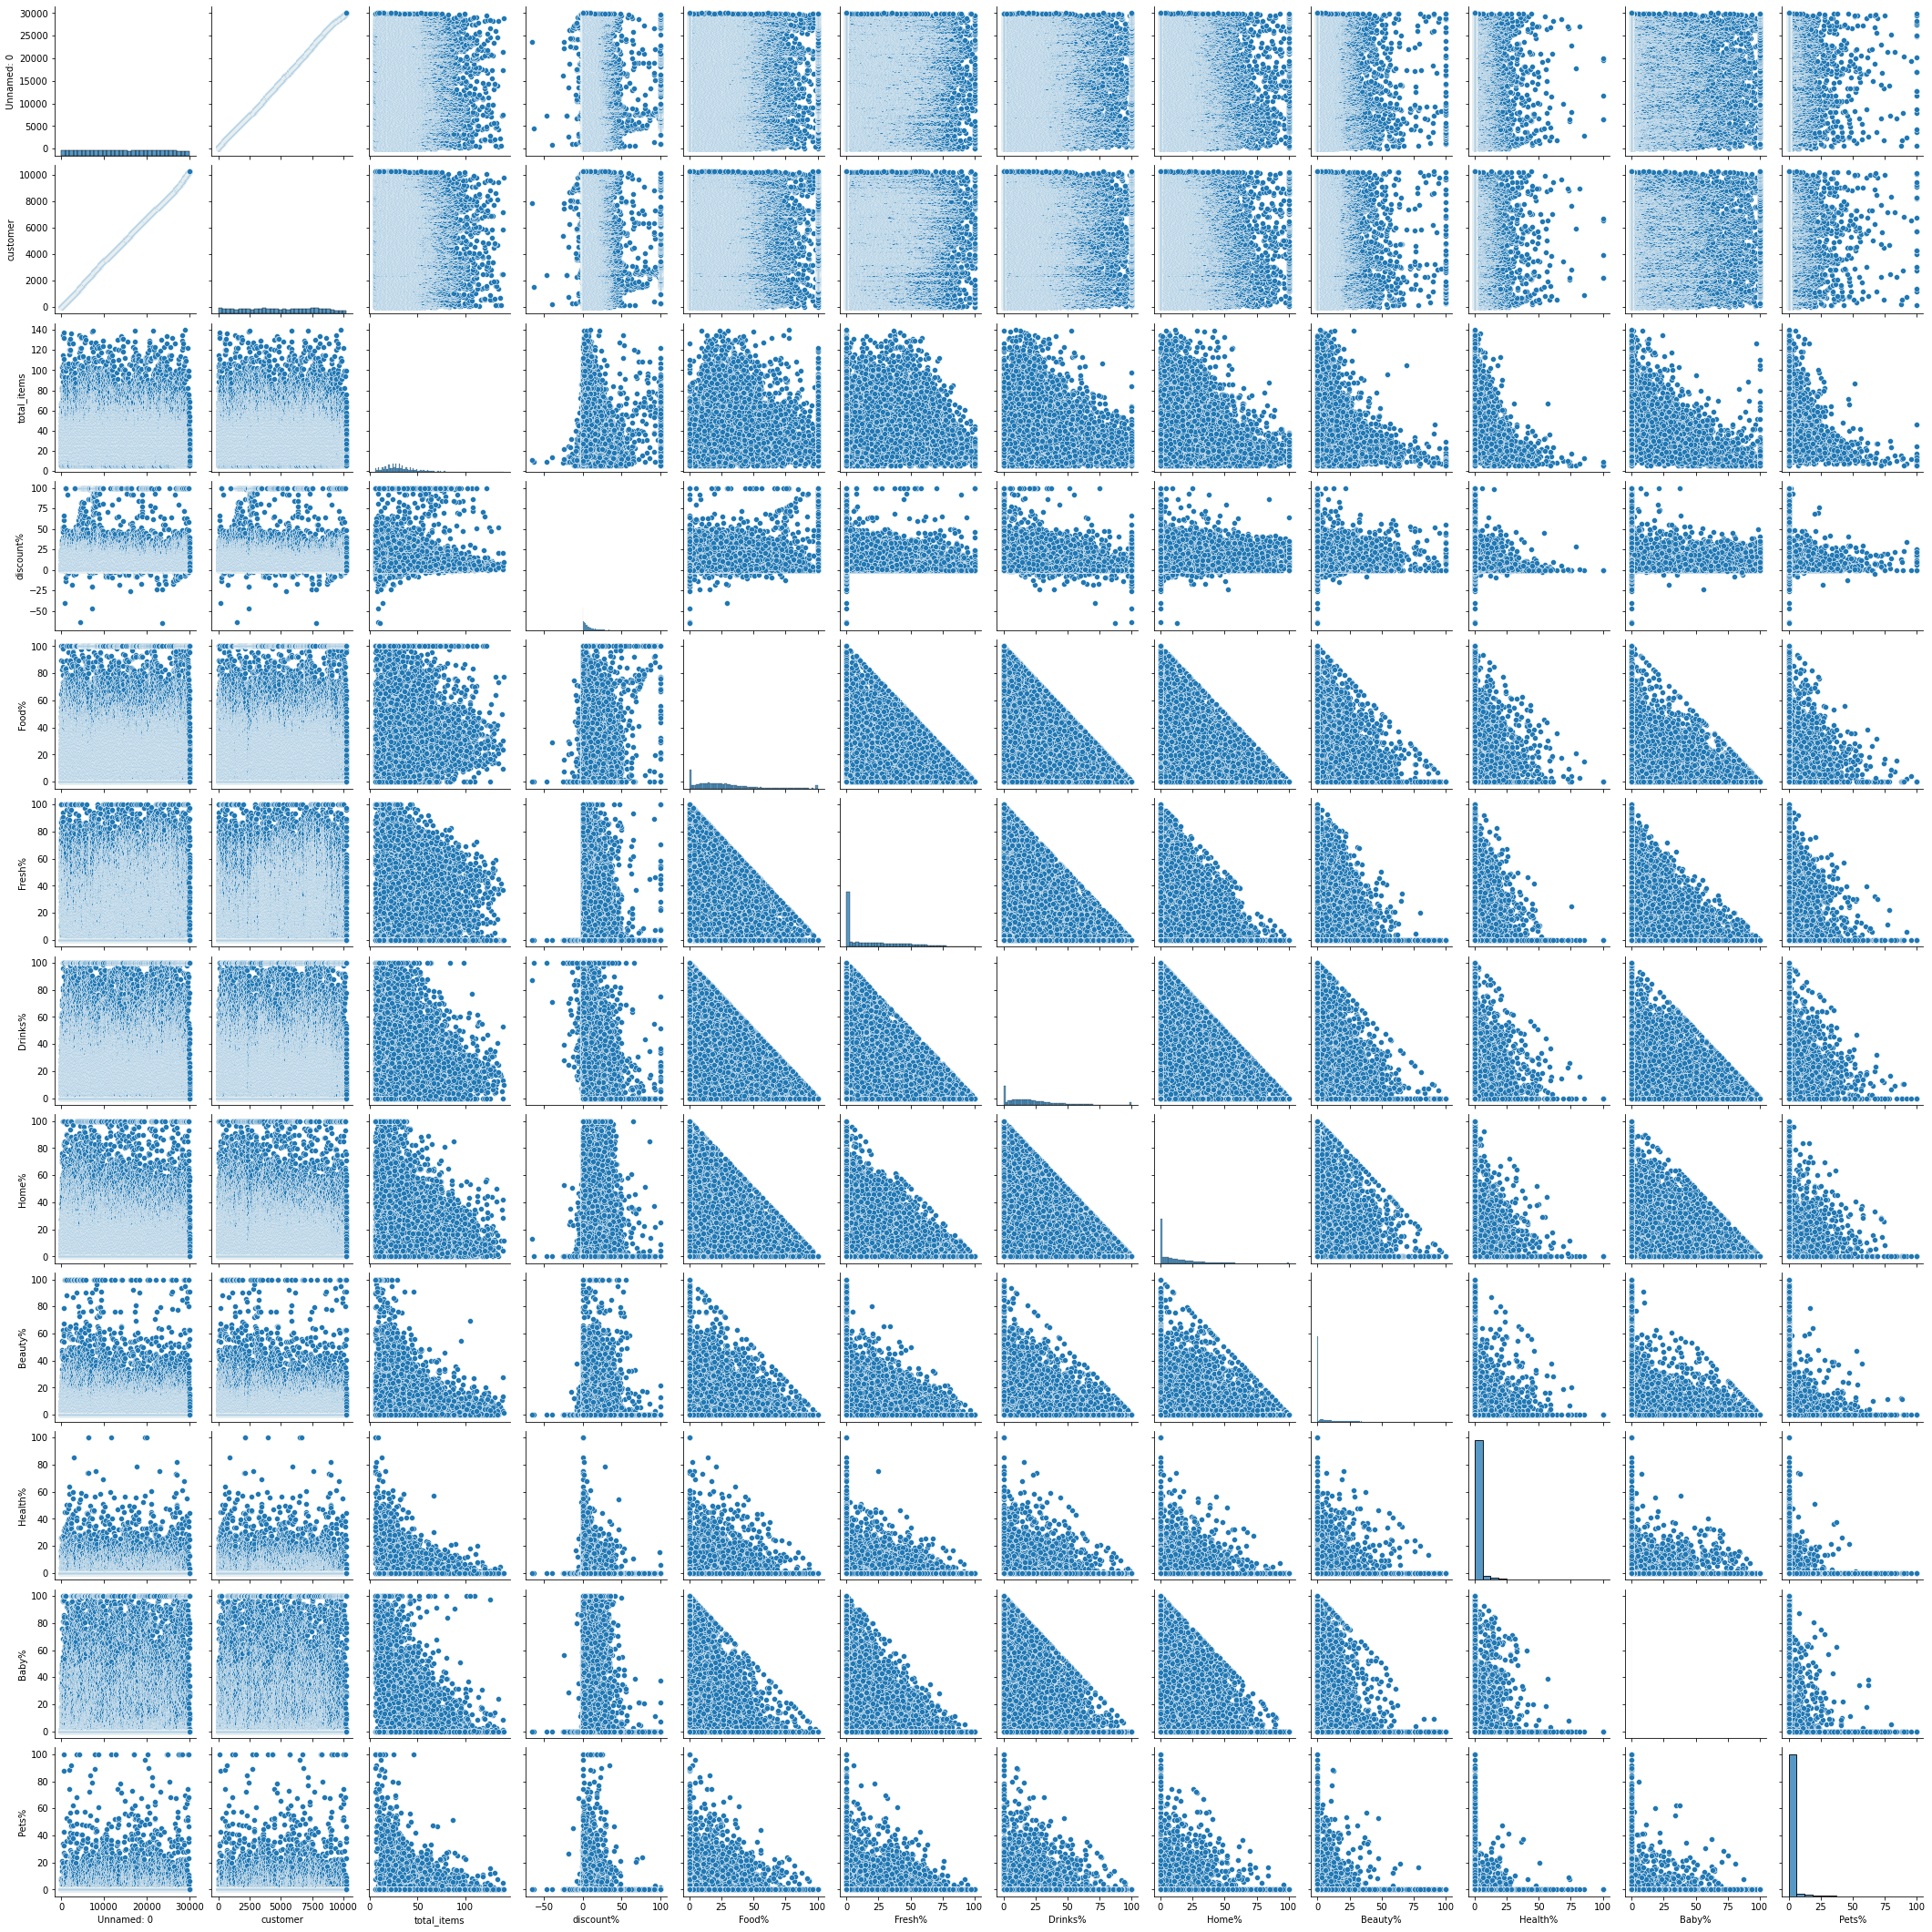

In [13]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

In [14]:
def dependant_variable_detector(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression
    scaler = StandardScaler()
    lr = LinearRegression()
    columns = list(df.columns)
    for col in columns:
        y = scaler.fit_transform(df[col].values.reshape(-1,1))
        X = scaler.fit_transform(df.drop(col, axis=1).values)
        lr.fit(X,y)
        print('Using '+col+' as dependent variable R2 score is :'+str(lr.score(X,y)))

In [15]:
dependant_variable_detector(df)

Using Unnamed: 0 as dependent variable R2 score is :0.9994704249261616
Using customer as dependent variable R2 score is :0.9994702670409068
Using total_items as dependent variable R2 score is :0.11298029341845395
Using discount% as dependent variable R2 score is :0.1517062153320311
Using Food% as dependent variable R2 score is :0.9943020247001583
Using Fresh% as dependent variable R2 score is :0.9954141531034477
Using Drinks% as dependent variable R2 score is :0.9947308777440521
Using Home% as dependent variable R2 score is :0.9915431557939612
Using Beauty% as dependent variable R2 score is :0.9751778717226803
Using Health% as dependent variable R2 score is :0.9088393141703913
Using Baby% as dependent variable R2 score is :0.9937809180274509
Using Pets% as dependent variable R2 score is :0.929552086655282


In [16]:
def plot_corr_matrix(df):
    df_corr = df.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    cax = ax.matshow(df_corr.values, interpolation='nearest')
    fig.colorbar(cax)
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)

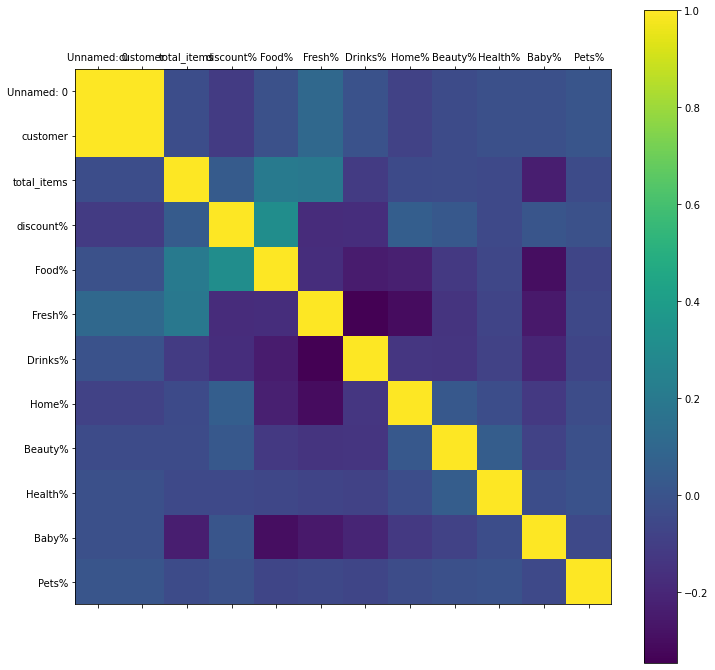

In [17]:
plot_corr_matrix(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


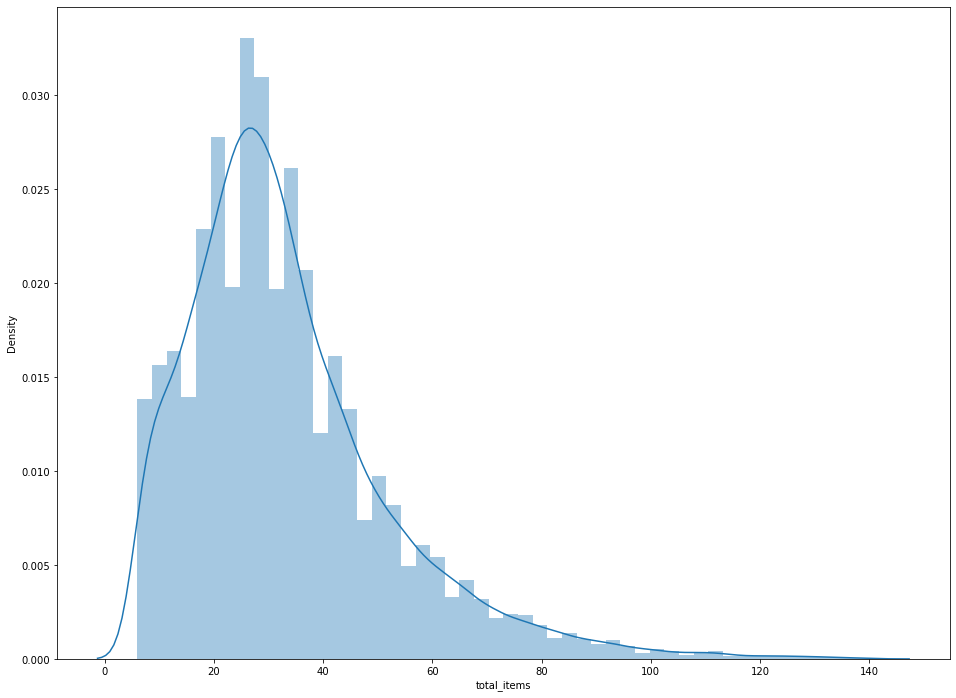

In [18]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


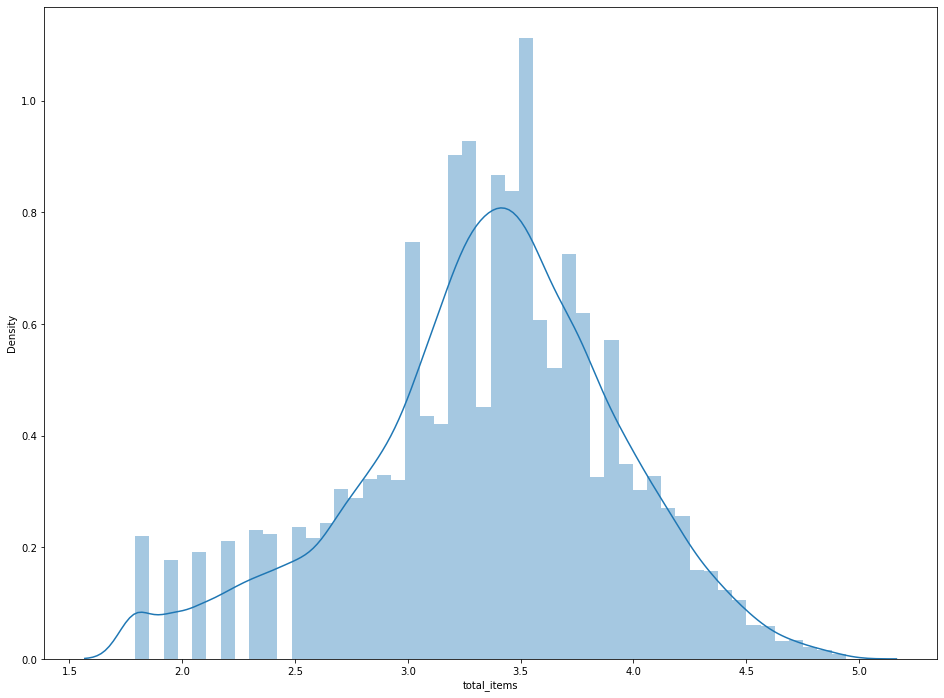

In [19]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

In [20]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [25]:
outlier_indices = turkey_outlier_detector(df)

_________________________
Unnamed: 0-------->0
_________________________
customer-------->0
_________________________
total_items-------->775
_________________________
discount%-------->2147
_________________________
Food%-------->1150
_________________________
Fresh%-------->137
_________________________
Drinks%-------->1255
_________________________
Home%-------->1194
_________________________
Beauty%-------->2472
_________________________
Health%-------->28101
_________________________
Baby%-------->6190
_________________________
Pets%-------->28101


In [26]:
print (df.shape)
df.drop(outlier_indices['total_items'], inplace=True)
df.shape

(28101, 12)


(27326, 12)

In [27]:
frame.drop(outlier_indices['total_items'], inplace=True)
print (df.count())
print (frame.count())

Unnamed: 0     27326
customer       27326
total_items    27326
discount%      27326
Food%          27326
Fresh%         27326
Drinks%        27326
Home%          27326
Beauty%        27326
Health%        27326
Baby%          27326
Pets%          27326
dtype: int64
Unnamed: 0     27326
customer       27326
order          27326
total_items    27326
discount%      27326
weekday        27326
hour           27326
Food%          27326
Fresh%         27326
Drinks%        27326
Home%          27326
Beauty%        27326
Health%        27326
Baby%          27326
Pets%          27326
dtype: int64


In [28]:
from sklearn.cluster import KMeans

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X = scaler.fit_transform(df.values)

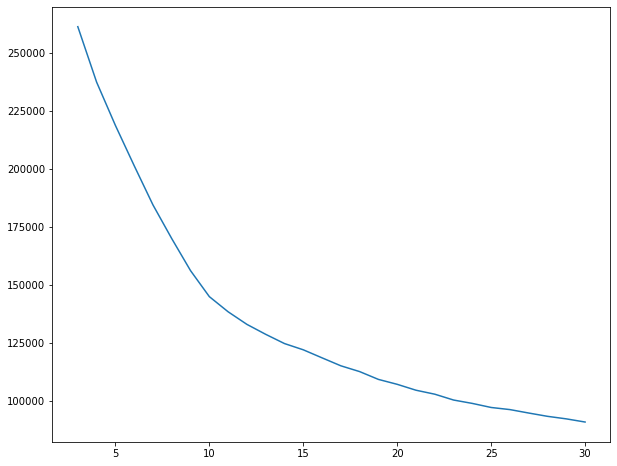

In [31]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()

In [32]:
def plot_silhoutte_score(X, max_clusters):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

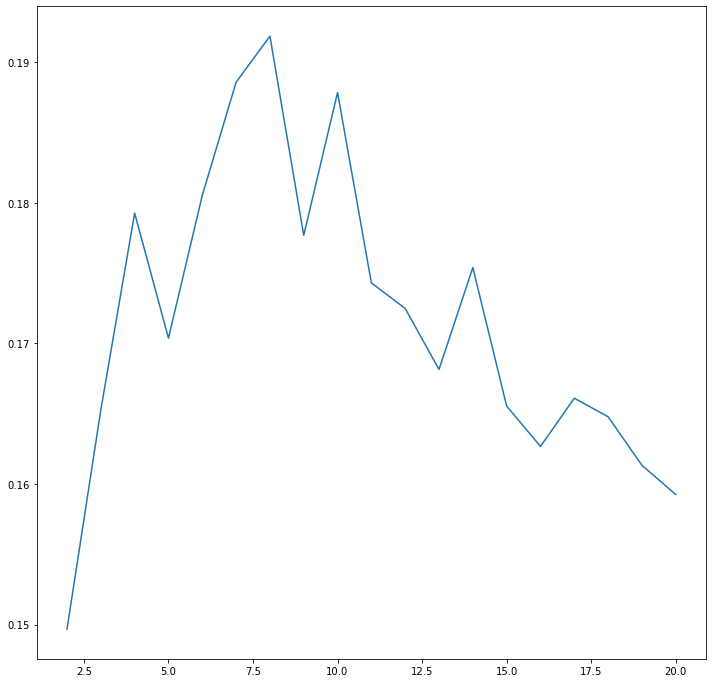

In [33]:
plot_silhoutte_score(X,20)

In [40]:
k = 10
kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)

In [41]:
frame[frame['labels']==0]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
5               5         1      5            8      23.89        4    13   
45             48         4     48           20       5.49        1    10   
96            105         9    105           13       0.00        1     8   
318           332        67    332           30       0.00        1    13   
336           350        70    350           23      19.10        3    23   
...           ...       ...    ...          ...        ...      ...   ...   
28077       29967     10220  29967           16      10.02        1    16   
28078       29968     10220  29968           19       2.01        2     8   
28083       29973     10222  29973           20       3.95        1     8   
28085       29975     10224  29975           27       0.00        4    12   
28090       29981     10228  29981           27      27.91        2    12   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  
5       0.00  100.00     0.00   0.00     0.00     0.00   0.00   0.00       0  
45      0.00   86.42    12.31   1.27     0.00     0.00   0.00   0.00       0  
96      5.35   89.89     4.77   0.00     0.00     0.00   0.00   0.00       0  
318     6.00   94.00     0.00   0.00     0.00     0.00   0.00   0.00       0  
336     8.94   91.06     0.00   0.00     0.00     0.00   0.00   0.00       0  
...      ...     ...      ...    ...      ...      ...    ...    ...     ...  
28077  10.87   75.95     0.00   0.00     0.00     0.00  13.18   0.00       0  
28078  20.54   52.23     0.00   0.00     0.00     0.00  27.23   0.00       0  
28083  17.51   59.08     6.71   0.00    10.39     0.00   0.00   6.31       0  
28085  38.09   56.94     4.96   0.00     0.00     0.00   0.00   0.00       0  
28090  19.43   53.57     2.80   7.98     3.57    12.66   0.00   0.00       0  

[5238 rows x 16 columns]

In [42]:
frame[frame['labels']==0].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   5238.000000   5238.000000   5238.000000  5238.000000  5238.000000   
mean   18894.302215   6311.719740  18894.302215    38.236541     4.895857   
std     6137.364483   2018.469616   6137.364483    17.652329     6.277790   
min        5.000000      1.000000      5.000000     8.000000     0.000000   
25%    14485.250000   4853.250000  14485.250000    26.000000     0.910000   
50%    19136.500000   6422.000000  19136.500000    34.000000     2.860000   
75%    23837.750000   7885.500000  23837.750000    47.000000     6.430000   
max    29981.000000  10228.000000  29981.000000   117.000000    65.100000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  5238.000000  5238.000000  5238.000000  5238.000000  5238.000000   
mean      3.694922    15.293051    18.490790    57.469924    12.533440   
std       2.107865     5.801094    10.836472    14.959080     9.888513   
min       1.000000     0.000000     0.000000    21.770000     0.000000   
25%       2.000000    11.000000    10.470000    46.160000     5.170000   
50%       3.000000    16.000000    17.665000    55.350000    10.805000   
75%       5.000000    20.000000    25.597500    66.867500    18.257500   
max       7.000000    23.000000    60.250000   100.000000    53.510000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  5238.000000  5238.000000  5238.000000  5238.000000  5238.000000  5238.0  
mean      6.065231     2.626491     0.424360     1.855134     0.456144     0.0  
std       7.453287     4.511899     1.817823     5.957781     2.082550     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     0.0  
25%       0.000000     0.000000     0.000000     0.000000     0.000000     0.0  
50%       3.420000     0.000000     0.000000     0.000000     0.000000     0.0  
75%       9.547500     3.980000     0.000000     0.000000     0.000000     0.0  
max      44.410000    30.300000    14.380000    44.380000    19.430000     0.0

In [43]:
frame.loc[frame['labels']==0, 'class'] = 'drinkers'

In [44]:
frame[frame['labels']==1]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
18             18         1     18           31      16.49        1    12   
22             22         1     22           36      16.62        5     9   
93            101         9    101           15       6.27        7    10   
94            103         9    103           17       4.36        7    23   
97            106         9    106           19       1.84        1    11   
...           ...       ...    ...          ...        ...      ...   ...   
27959       29821     10158  29821           11       5.34        5    21   
27981       29844     10167  29844           26       2.78        5    18   
28019       29895     10192  29895           21       7.94        7    14   
28070       29956     10214  29956           20       9.95        2     1   
28087       29978     10227  29978           22      24.90        4    13   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
18     24.27   33.09    16.18   0.00     0.00    26.47    0.0   0.00       1   
22     18.66   47.13    17.50   0.00     0.00    16.71    0.0   0.00       1   
93     18.10   62.86     0.00   0.00     0.00    19.05    0.0   0.00       1   
94      2.62   25.94    50.35   0.00     0.00    21.08    0.0   0.00       1   
97      0.00   58.39     6.62  10.44     0.00    24.55    0.0   0.00       1   
...      ...     ...      ...    ...      ...      ...    ...    ...     ...   
27959  23.62   23.62    14.75   0.00     0.00    38.00    0.0   0.00       1   
27981  33.34   15.70    19.04   0.00     3.53    28.39    0.0   0.00       1   
28019   5.46    0.00    16.01  20.47    15.22    19.39    0.0  23.45       1   
28070  11.46   46.20    17.55   0.00     0.00    24.78    0.0   0.00       1   
28087   0.00    0.00     0.00   0.00    55.96    44.04    0.0   0.00       1   

      class  
18      NaN  
22      NaN  
93      NaN  
94      NaN  
97      NaN  
...     ...  
27959   NaN  
27981   NaN  
28019   NaN  
28070   NaN  
28087   NaN  

[705 rows x 17 columns]

In [45]:
frame[frame['labels']==1].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    705.000000    705.000000    705.000000   705.000000  705.000000   
mean   13871.119149   4635.617021  13871.119149    26.841135    5.717844   
std     8538.922342   2852.073631   8538.922342    13.600959    8.359051   
min       18.000000      1.000000     18.000000     8.000000   -5.540000   
25%     6442.000000   2176.000000   6442.000000    18.000000    0.830000   
50%    13821.000000   4649.000000  13821.000000    24.000000    2.870000   
75%    20985.000000   7021.000000  20985.000000    33.000000    7.050000   
max    29978.000000  10227.000000  29978.000000   113.000000   52.490000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  705.000000  705.000000  705.000000  705.000000  705.000000  705.000000   
mean     3.770213   14.870922   19.277433   13.444454   17.444610   11.921787   
std      2.168595    5.884452   14.775374   16.501292   14.954726   13.189601   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   11.000000    7.910000    0.000000    5.860000    0.000000   
50%      3.000000   15.000000   17.350000    6.100000   14.670000    7.870000   
75%      6.000000   20.000000   26.980000   22.930000   24.900000   18.590000   
max      7.000000   23.000000   77.690000   82.970000   75.630000   72.470000   

          Beauty%     Health%       Baby%       Pets%  labels  
count  705.000000  705.000000  705.000000  705.000000   705.0  
mean     6.682794   24.916255    5.559702    0.710695     1.0  
std      9.669788   12.043571   13.285184    2.903230     0.0  
min      0.000000   12.170000    0.000000    0.000000     1.0  
25%      0.000000   16.680000    0.000000    0.000000     1.0  
50%      2.670000   20.970000    0.000000    0.000000     1.0  
75%     10.170000   29.110000    0.000000    0.000000     1.0  
max     65.470000  100.000000   71.000000   23.770000     1.0

In [46]:
frame.loc[frame['labels']==1, 'class'] = 'beauty_conscious'

In [47]:
frame[frame['labels']==2]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
0               0         0      0           45      23.03        4    13   
1               1         0      1           38       1.22        5    13   
2               2         0      2           51      18.08        4    13   
3               3         1      3           57      16.51        1    12   
4               4         1      4           53      18.31        2    11   
...           ...       ...    ...          ...        ...      ...   ...   
14591       15356      5163  15356           85       0.28        7    23   
14592       15357      5163  15357           71       7.24        7    23   
14666       15432      5178  15432           72       4.18        7     0   
14667       15433      5178  15433           77       8.04        7    20   
15093       15918      5324  15918           85       5.90        1    18   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
0       9.46   87.06     3.48   0.00     0.00     0.00   0.00    0.0       2   
1      15.87   75.80     6.22   2.12     0.00     0.00   0.00    0.0       2   
2      16.88   56.75     3.37  16.48     6.53     0.00   0.00    0.0       2   
3      28.81   35.99    11.78   4.62     2.87    15.92   0.00    0.0       2   
4      24.13   60.38     7.78   7.72     0.00     0.00   0.00    0.0       2   
...      ...     ...      ...    ...      ...      ...    ...    ...     ...   
14591  25.60   24.34    24.11   7.07    11.56     0.00   7.32    0.0       2   
14592  12.75   19.18    31.09  28.82     1.49     0.00   6.68    0.0       2   
14666  30.52   23.02    14.49  21.07     7.38     3.52   0.00    0.0       2   
14667  46.33   32.89     7.65   7.25     0.00     4.09   1.78    0.0       2   
15093  12.76   22.06    12.94  25.78    17.26     8.21   1.00    0.0       2   

      class  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
14591   NaN  
14592   NaN  
14666   NaN  
14667   NaN  
15093   NaN  

[6428 rows x 17 columns]

In [48]:
frame[frame['labels']==2].describe()

Unnamed: 0     customer         order  total_items    discount%  \
count   6428.000000  6428.000000   6428.000000  6428.000000  6428.000000   
mean    6339.462352  2124.519913   6339.462352    41.130678     6.703284   
std     4148.878491  1435.293780   4148.878491    18.737349     7.399177   
min        0.000000     0.000000      0.000000     8.000000    -5.770000   
25%     2694.750000   838.000000   2694.750000    28.000000     1.800000   
50%     5927.500000  1999.000000   5927.500000    37.000000     4.300000   
75%     9870.250000  3426.000000   9870.250000    50.000000     8.772500   
max    15918.000000  5324.000000  15918.000000   118.000000    60.890000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  6428.000000  6428.000000  6428.000000  6428.000000  6428.000000   
mean      3.726353    15.274736    32.395305    21.914844    24.175042   
std       2.142564     5.723177    17.989746    18.885662    14.307956   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000    19.590000     3.267500    13.460000   
50%       3.000000    16.000000    29.745000    20.050000    22.250000   
75%       6.000000    20.000000    42.230000    35.180000    34.075000   
max       7.000000    23.000000   100.000000    87.060000    77.040000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  6428.000000  6428.000000  6428.000000  6428.000000  6428.000000  6428.0  
mean     12.105688     4.097610     0.575618     4.092043     0.530020     2.0  
std      10.405286     5.692416     2.072066     9.061350     2.349294     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     2.0  
25%       2.757500     0.000000     0.000000     0.000000     0.000000     2.0  
50%      10.230000     0.000000     0.000000     0.000000     0.000000     2.0  
75%      19.562500     6.942500     0.000000     1.125000     0.000000     2.0  
max      48.230000    26.960000    15.920000    50.650000    19.960000     2.0

In [49]:
frame.loc[frame['labels']==2, 'class'] = 'loyal_fresh'

In [50]:
frame[frame['labels']==3]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
12188       12775      4295  12775           21      21.57        7    20   
12247       12839      4316  12839            9       0.36        2    11   
12257       12850      4321  12850           26       0.00        5    15   
12266       12859      4323  12859           15       7.72        2    10   
12267       12860      4323  12860           23       4.08        5    13   
...           ...       ...    ...          ...        ...      ...   ...   
28094       29987     10230  29987           27       9.83        3    14   
28095       29988     10231  29988            8       0.52        4     9   
28096       29989     10231  29989           15       7.70        1     0   
28097       29990     10231  29990           22       8.97        7    12   
28098       29991     10231  29991           15       3.92        5    11   

        Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
12188   82.66    0.00    17.34   0.00      0.0      0.0   0.00    0.0       3   
12247  100.00    0.00     0.00   0.00      0.0      0.0   0.00    0.0       3   
12257   80.67    0.00     6.57  12.76      0.0      0.0   0.00    0.0       3   
12266   88.53    0.00     0.00  11.47      0.0      0.0   0.00    0.0       3   
12267   86.53    0.00     0.00  13.47      0.0      0.0   0.00    0.0       3   
...       ...     ...      ...    ...      ...      ...    ...    ...     ...   
28094   14.82    0.00    14.27  44.97      0.0      0.0  25.93    0.0       3   
28095   28.21    0.00    48.34  23.44      0.0      0.0   0.00    0.0       3   
28096   61.32    0.00    23.34  15.34      0.0      0.0   0.00    0.0       3   
28097   29.74   28.72    19.52  22.02      0.0      0.0   0.00    0.0       3   
28098   23.38   35.70    40.92   0.00      0.0      0.0   0.00    0.0       3   

      class  
12188   NaN  
12247   NaN  
12257   NaN  
12266   NaN  
12267   NaN  
...     ...  
28094   NaN  
28095   NaN  
28096   NaN  
28097   NaN  
28098   NaN  

[5354 rows x 17 columns]

In [51]:
frame[frame['labels']==3].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count   5354.000000   5354.000000   5354.000000  5354.000000  5354.00000   
mean   23205.232536   7733.545760  23205.232536    37.382331     6.18940   
std     4273.342361   1420.710024   4273.342361    17.642931     7.15718   
min    12775.000000   4295.000000  12775.000000     8.000000   -11.99000   
25%    19847.750000   6624.500000  19847.750000    25.000000     1.63000   
50%    23696.500000   7832.000000  23696.500000    33.000000     4.00000   
75%    26849.750000   8882.000000  26849.750000    45.000000     8.19750   
max    29991.000000  10231.000000  29991.000000   117.000000    51.90000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  5354.000000  5354.000000  5354.000000  5354.000000  5354.000000   
mean      3.567613    15.148487    38.258397    14.967957    24.384888   
std       2.091858     5.830871    20.005714    13.193737    14.404172   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000    24.282500     0.000000    13.410000   
50%       3.000000    16.000000    34.865000    14.015000    23.520000   
75%       5.000000    20.000000    47.887500    26.127500    34.557500   
max       7.000000    23.000000   100.000000    50.300000    74.170000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  5354.000000  5354.000000  5354.000000  5354.000000  5354.000000  5354.0  
mean     13.096405     4.600402     0.531391     3.509083     0.514895     3.0  
std      11.787246     6.350847     2.043943     8.599101     2.267339     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     3.0  
25%       2.545000     0.000000     0.000000     0.000000     0.000000     3.0  
50%      10.715000     0.000000     0.000000     0.000000     0.000000     3.0  
75%      21.010000     7.680000     0.000000     0.000000     0.000000     3.0  
max      57.280000    30.070000    15.570000    52.350000    20.130000     3.0

In [52]:
frame.loc[frame['labels']==3, 'class'] = 'new parents'

In [53]:
frame[frame['labels']==4]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
152           162        26    162           25       0.00        1    18   
387           404        85    404           13       1.40        4    22   
443           461       109    461           43       5.75        2    12   
525           551       129    551           12      25.04        2    20   
550           579       141    579           14      11.36        5    22   
...           ...       ...    ...          ...        ...      ...   ...   
27933       29791     10143  29791           11      21.96        2    16   
28017       29893     10192  29893           24      40.37        5    19   
28020       29896     10192  29896           35       6.32        3    13   
28027       29905     10198  29905           21       7.90        4    19   
28028       29906     10198  29906           20       1.92        4    17   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%   Pets%  labels  \
152     6.88    0.00    24.65  43.58     3.70     0.00    0.0   21.19       4   
387    10.14    8.11    52.34   9.74     0.00     0.00    0.0   19.67       4   
443    22.37    0.00    25.56   3.42    12.18     2.81    0.0   33.65       4   
525     0.00    0.00     0.00   0.00     0.00     0.00    0.0  100.00       4   
550     0.00    0.00    67.13   0.00     0.00     0.00    0.0   32.87       4   
...      ...     ...      ...    ...      ...      ...    ...     ...     ...   
27933   0.00    0.00     0.00   0.00     0.00     0.00    0.0  100.00       4   
28017  24.37    0.00    29.13   0.00     0.00     0.00    0.0   46.50       4   
28020   6.03    0.00    19.48  20.61    16.11     0.00    0.0   37.77       4   
28027  20.99    0.00    11.36  32.31     0.00     0.00    0.0   35.35       4   
28028  12.46    0.00     4.46  45.37     0.00     0.00    0.0   37.71       4   

      class  
152     NaN  
387     NaN  
443     NaN  
525     NaN  
550     NaN  
...     ...  
27933   NaN  
28017   NaN  
28020   NaN  
28027   NaN  
28028   NaN  

[440 rows x 17 columns]

In [54]:
frame[frame['labels']==4].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    440.000000    440.000000    440.000000   440.000000  440.000000   
mean   15231.670455   5101.159091  15231.670455    26.986364    8.090705   
std     8125.627594   2710.883692   8125.627594    15.064774    8.996611   
min      162.000000     26.000000    162.000000     8.000000  -18.060000   
25%     8706.750000   3010.500000   8706.750000    17.000000    1.587500   
50%    16236.000000   5438.500000  16236.000000    24.000000    5.590000   
75%    21913.250000   7306.000000  21913.250000    33.000000   11.935000   
max    29906.000000  10198.000000  29906.000000   100.000000   68.140000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  440.000000  440.000000  440.000000  440.000000  440.000000  440.000000   
mean     3.538636   14.813636   15.539795   12.025886   18.113114   11.674000   
std      2.114783    5.715088   13.366212   15.705135   16.230814   13.159779   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   11.000000    4.470000    0.000000    5.092500    0.000000   
50%      3.000000   15.000000   14.285000    3.855000   14.760000    7.620000   
75%      5.000000   20.000000   21.980000   21.280000   25.982500   18.030000   
max      7.000000   23.000000   72.120000   75.680000   76.180000   69.480000   

          Beauty%     Health%       Baby%       Pets%  labels  
count  440.000000  440.000000  440.000000  440.000000   440.0  
mean     3.689636    0.528091    2.551273   35.839477     4.0  
std      7.241187    2.766415    8.762999   19.037481     0.0  
min      0.000000    0.000000    0.000000   17.230000     4.0  
25%      0.000000    0.000000    0.000000   22.677500     4.0  
50%      0.000000    0.000000    0.000000   29.225000     4.0  
75%      4.900000    0.000000    0.000000   41.127500     4.0  
max     47.250000   26.290000   74.960000  100.000000     4.0

In [55]:
frame.loc[frame['labels']==4, 'class'] = 'loyal'

In [56]:
frame[frame['labels']==5]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
417           435       100    435           38      49.11        1    21   
418           436       100    436           78      51.85        3    16   
419           437       100    437           78      46.89        2    19   
928           965       260    965           23     100.00        2    11   
929           966       260    966           31     100.00        4    12   
...           ...       ...    ...          ...        ...      ...   ...   
27033       28709      9635  28709           25     100.00        2    20   
27374       29130      9856  29130           16     100.00        2    20   
27375       29131      9856  29131           15     100.00        3     3   
27916       29769     10129  29769           24     100.00        2    12   
27917       29770     10129  29770           23     100.00        2    12   

        Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
417     98.15    0.00     1.85   0.00     0.00      0.0   0.00    0.0       5   
418     69.90    0.00    29.01   0.00     0.00      0.0   1.09    0.0       5   
419     84.86    0.00     7.79   4.24     0.00      0.0   3.11    0.0       5   
928     20.50   41.56    22.99   9.03     5.92      0.0   0.00    0.0       5   
929     50.49   23.49    26.02   0.00     0.00      0.0   0.00    0.0       5   
...       ...     ...      ...    ...      ...      ...    ...    ...     ...   
27033  100.00    0.00     0.00   0.00     0.00      0.0   0.00    0.0       5   
27374  100.00    0.00     0.00   0.00     0.00      0.0   0.00    0.0       5   
27375  100.00    0.00     0.00   0.00     0.00      0.0   0.00    0.0       5   
27916  100.00    0.00     0.00   0.00     0.00      0.0   0.00    0.0       5   
27917  100.00    0.00     0.00   0.00     0.00      0.0   0.00    0.0       5   

      class  
417     NaN  
418     NaN  
419     NaN  
928     NaN  
929     NaN  
...     ...  
27033   NaN  
27374   NaN  
27375   NaN  
27916   NaN  
27917   NaN  

[494 rows x 17 columns]

In [57]:
frame[frame['labels']==5].describe()

Unnamed: 0      customer         order  total_items   discount%  \
count    494.000000    494.000000    494.000000   494.000000  494.000000   
mean    9413.327935   3167.892713   9413.327935    46.720648   94.128664   
std     6532.055862   2184.070113   6532.055862    23.442885   13.719788   
min      435.000000    100.000000    435.000000     8.000000   38.450000   
25%     4924.000000   1648.000000   4924.000000    28.000000  100.000000   
50%     7529.500000   2561.500000   7529.500000    46.000000  100.000000   
75%     9792.500000   3409.000000   9792.500000    63.000000  100.000000   
max    29770.000000  10129.000000  29770.000000   118.000000  100.000000   

          weekday        hour       Food%      Fresh%     Drinks%       Home%  \
count  494.000000  494.000000  494.000000  494.000000  494.000000  494.000000   
mean     3.613360   15.334008   94.059231    1.914393    2.119028    0.856599   
std      2.027775    4.927031   16.927264    9.917282    7.514485    4.445556   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000   12.000000  100.000000    0.000000    0.000000    0.000000   
50%      3.000000   15.500000  100.000000    0.000000    0.000000    0.000000   
75%      5.000000   19.000000  100.000000    0.000000    0.000000    0.000000   
max      7.000000   23.000000  100.000000  100.000000   75.020000   37.410000   

          Beauty%     Health%       Baby%       Pets%  labels  
count  494.000000  494.000000  494.000000  494.000000   494.0  
mean     0.442328    0.084818    0.382126    0.120283     5.0  
std      2.635015    0.987331    3.014337    1.536870     0.0  
min      0.000000    0.000000    0.000000    0.000000     5.0  
25%      0.000000    0.000000    0.000000    0.000000     5.0  
50%      0.000000    0.000000    0.000000    0.000000     5.0  
75%      0.000000    0.000000    0.000000    0.000000     5.0  
max     33.070000   15.420000   37.220000   24.080000     5.0

In [58]:
frame.loc[frame['labels']==5, 'class'] = 'home owners'

In [59]:
frame[frame['labels']==6]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
62             69         4     69           10       5.00        2    22   
85             93         8     93           17      30.60        1    22   
125           135        15    135           25      10.98        7    14   
138           148        21    148           17       0.81        3    20   
141           151        21    151           22       0.74        1    21   
...           ...       ...    ...          ...        ...      ...   ...   
28000       29875     10182  29875           17      31.28        3    13   
28012       29888     10190  29888           14      21.28        3    16   
28026       29904     10198  29904           40       9.33        3    20   
28047       29926     10200  29926           15      13.48        3    12   
28052       29931     10201  29931           21      12.71        4    12   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
62      0.00   60.98     0.00  39.02     0.00     0.00   0.00   0.00       6   
85     24.87    0.00    15.77  48.51    10.85     0.00   0.00   0.00       6   
125     0.00   12.29    25.54  51.25     6.73     4.19   0.00   0.00       6   
138    18.39    0.00    32.70  43.74     5.17     0.00   0.00   0.00       6   
141    15.56    0.00    27.22  46.60     7.15     0.00   3.47   0.00       6   
...      ...     ...      ...    ...      ...      ...    ...    ...     ...   
28000   0.00    0.00     0.00  70.71    29.29     0.00   0.00   0.00       6   
28012  39.20    0.00     0.00  60.80     0.00     0.00   0.00   0.00       6   
28026  11.34    0.00     0.83  75.45     3.24     0.00   0.00   9.14       6   
28047   2.46   38.81     0.00  58.73     0.00     0.00   0.00   0.00       6   
28052  19.58    0.00    14.86  56.12     9.43     0.00   0.00   0.00       6   

      class  
62      NaN  
85      NaN  
125     NaN  
138     NaN  
141     NaN  
...     ...  
28000   NaN  
28012   NaN  
28026   NaN  
28047   NaN  
28052   NaN  

[2446 rows x 17 columns]

In [60]:
frame[frame['labels']==6].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   2446.000000   2446.000000   2446.000000  2446.000000  2446.000000   
mean   11913.284546   3989.261243  11913.284546    26.352003    12.952633   
std     7606.816612   2546.571980   7606.816612    12.751197    10.419447   
min       69.000000      4.000000     69.000000     8.000000   -23.980000   
25%     5650.750000   1903.750000   5650.750000    17.000000     4.865000   
50%    11145.500000   3764.000000  11145.500000    24.000000    11.510000   
75%    16942.500000   5698.250000  16942.500000    33.000000    18.762500   
max    29931.000000  10201.000000  29931.000000   105.000000    86.090000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  2446.000000  2446.000000  2446.000000  2446.000000  2446.000000   
mean      3.577678    14.836468    13.177653     5.493520    19.190818   
std       2.129042     5.487543    12.065975    10.081165    14.984161   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000     2.017500     0.000000     6.017500   
50%       3.000000    15.000000    11.165000     0.000000    17.965000   
75%       5.000000    20.000000    21.152500     7.275000    30.147500   
max       7.000000    23.000000    63.130000    69.310000    61.150000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  2446.000000  2446.000000  2446.000000  2446.000000  2446.000000  2446.0  
mean     53.771288     4.240904     0.439898     3.294967     0.315981     6.0  
std      17.356758     6.340965     1.909251     8.501913     1.961582     0.0  
min      17.350000     0.000000     0.000000     0.000000     0.000000     6.0  
25%      41.632500     0.000000     0.000000     0.000000     0.000000     6.0  
50%      49.395000     0.000000     0.000000     0.000000     0.000000     6.0  
75%      61.825000     7.367500     0.000000     0.000000     0.000000     6.0  
max     100.000000    32.950000    15.230000    47.460000    22.140000     6.0

In [61]:
frame.loc[frame['labels']==6, 'class'] = 'pet owners'

In [62]:
frame[frame['labels']==7]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
105           115        11    115           24      16.27        4    21   
165           175        29    175           39      10.03        7    23   
267           279        55    279           22       0.42        3    17   
268           280        55    280            9       0.48        3    17   
271           283        55    283           23       0.30        6    15   
...           ...       ...    ...          ...        ...      ...   ...   
28061       29946     10209  29946            8       0.00        7    16   
28067       29953     10213  29953            8      35.10        4     0   
28086       29976     10225  29976            8       3.06        4    12   
28092       29985     10230  29985           13       4.94        1    23   
28093       29986     10230  29986           12       5.00        3    14   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%   Baby%  Pets%  labels  \
105    17.02    3.77     3.12   0.00     0.00      0.0   76.10    0.0       7   
165     8.76   14.39    16.77   6.93     3.36      0.0   49.79    0.0       7   
267     5.03   37.48     3.62   5.92     0.00      0.0   47.95    0.0       7   
268     9.64   29.57     9.54   0.00    20.32      0.0   30.94    0.0       7   
271     8.84   35.90     8.16   0.00     0.00      0.0   47.10    0.0       7   
...      ...     ...      ...    ...      ...      ...     ...    ...     ...   
28061   0.00    0.00     0.00   0.00     0.00      0.0  100.00    0.0       7   
28067   0.00    0.00     0.00   0.00     0.00      0.0  100.00    0.0       7   
28086   0.00    0.00     0.00   0.00     0.00      0.0  100.00    0.0       7   
28092  13.33    0.00    13.99   4.90     6.39      0.0   61.39    0.0       7   
28093  14.37    0.00    11.84   3.92     2.38      0.0   67.49    0.0       7   

      class  
105     NaN  
165     NaN  
267     NaN  
268     NaN  
271     NaN  
...     ...  
28061   NaN  
28067   NaN  
28086   NaN  
28092   NaN  
28093   NaN  

[2396 rows x 17 columns]

In [63]:
frame[frame['labels']==7].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   2396.000000   2396.000000   2396.000000  2396.000000  2396.000000   
mean   14545.570534   4866.132721  14545.570534    20.247913     8.668823   
std     8094.831071   2697.730658   8094.831071    10.814796     9.486282   
min      115.000000     11.000000    115.000000     8.000000   -23.890000   
25%     7817.250000   2695.500000   7817.250000    12.000000     1.200000   
50%    14510.000000   4867.000000  14510.000000    18.000000     4.865000   
75%    20623.250000   6882.250000  20623.250000    25.000000    13.925000   
max    29986.000000  10230.000000  29986.000000   110.000000    50.890000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  2396.000000  2396.000000  2396.000000  2396.000000  2396.000000   
mean      3.728297    15.176962     8.591536     5.341052    14.432250   
std       2.245675     6.010255     9.756792     8.994251    12.658628   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000     0.000000     0.000000     3.145000   
50%       3.000000    16.000000     5.830000     0.000000    12.410000   
75%       6.000000    21.000000    13.360000     8.065000    22.272500   
max       7.000000    23.000000    63.640000    55.630000    59.370000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  2396.000000  2396.000000  2396.000000  2396.000000  2396.000000  2396.0  
mean      8.492254     2.709328     0.408727    59.655046     0.219558     7.0  
std      10.713158     5.291400     2.054534    18.935874     1.587575     0.0  
min       0.000000     0.000000     0.000000    23.940000     0.000000     7.0  
25%       0.000000     0.000000     0.000000    45.007500     0.000000     7.0  
50%       4.225000     0.000000     0.000000    55.285000     0.000000     7.0  
75%      13.672500     3.537500     0.000000    72.677500     0.000000     7.0  
max      51.950000    36.550000    18.310000   100.000000    20.700000     7.0

In [65]:
frame.loc[frame['labels']==7, 'class'] = 'grocers'

In [66]:
frame[frame['labels']==8]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
130           140        18    140           16      21.57        4    13   
154           164        27    164           15       8.69        7    11   
209           220        45    220           20       3.66        1    14   
240           252        50    252           26       6.60        6    22   
281           293        58    293           17      13.75        3    14   
...           ...       ...    ...          ...        ...      ...   ...   
28065       29951     10211  29951           13       0.00        2    20   
28068       29954     10214  29954            9       0.00        4     0   
28072       29958     10215  29958           15       3.18        1    13   
28099       29997     10237  29997           54       0.00        4    17   
28100       29998     10237  29998           10       0.00        5    10   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
130     1.69   36.07    62.24   0.00     0.00      0.0   0.00    0.0       8   
154    31.68    0.00    61.41   2.76     4.15      0.0   0.00    0.0       8   
209     0.00    3.89    68.21   6.99    20.90      0.0   0.00    0.0       8   
240    14.50    7.97    72.12   5.41     0.00      0.0   0.00    0.0       8   
281    12.55    0.00    69.47  17.99     0.00      0.0   0.00    0.0       8   
...      ...     ...      ...    ...      ...      ...    ...    ...     ...   
28065   0.00    0.00   100.00   0.00     0.00      0.0   0.00    0.0       8   
28068   0.00    0.00   100.00   0.00     0.00      0.0   0.00    0.0       8   
28072   6.47   20.15    51.74  10.27     0.00      0.0  11.37    0.0       8   
28099   9.25    0.00    77.48  13.27     0.00      0.0   0.00    0.0       8   
28100   0.00    0.00   100.00   0.00     0.00      0.0   0.00    0.0       8   

      class  
130     NaN  
154     NaN  
209     NaN  
240     NaN  
281     NaN  
...     ...  
28065   NaN  
28068   NaN  
28072   NaN  
28099   NaN  
28100   NaN  

[2736 rows x 17 columns]

In [67]:
frame[frame['labels']==8].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   2736.000000   2736.000000   2736.000000  2736.000000  2736.000000   
mean   15369.976974   5139.005482  15369.976974    23.097222     5.425048   
std     7877.108602   2623.341787   7877.108602    10.948477     7.863076   
min      140.000000     18.000000    140.000000     8.000000   -65.150000   
25%     9449.000000   3270.000000   9449.000000    15.000000     0.540000   
50%    15658.500000   5246.000000  15658.500000    21.000000     3.395000   
75%    21415.250000   7143.000000  21415.250000    29.000000     7.662500   
max    29998.000000  10237.000000  29998.000000    98.000000    66.140000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  2736.000000  2736.000000  2736.000000  2736.000000  2736.000000   
mean      3.533991    14.616228    11.371747     5.212197    71.367372   
std       1.997333     5.397103    11.521602     9.478200    17.349835   
min       1.000000     0.000000     0.000000     0.000000    19.490000   
25%       2.000000    11.000000     0.000000     0.000000    57.590000   
50%       3.000000    15.000000     8.785000     0.000000    68.250000   
75%       5.000000    19.000000    18.880000     7.535000    84.672500   
max       7.000000    23.000000    56.860000    55.960000   100.000000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  2736.000000  2736.000000  2736.000000  2736.000000  2736.000000  2736.0  
mean      7.827248     1.825212     0.218428     1.729777     0.237957     8.0  
std      10.178139     4.341529     1.392697     6.244360     1.655105     0.0  
min       0.000000     0.000000     0.000000     0.000000     0.000000     8.0  
25%       0.000000     0.000000     0.000000     0.000000     0.000000     8.0  
50%       2.620000     0.000000     0.000000     0.000000     0.000000     8.0  
75%      13.725000     0.000000     0.000000     0.000000     0.000000     8.0  
max      44.890000    27.430000    16.720000    42.690000    18.510000     8.0

In [68]:
frame.loc[frame['labels']==8, 'class'] = 'Health_concious'

In [69]:
frame[frame['labels']==9]

Unnamed: 0  customer  order  total_items  discount%  weekday  hour  \
98            107         9    107           29       8.02        7    10   
101           111        10    111           23      15.94        1    19   
102           112        10    112           26       6.93        3    22   
142           152        22    152           31       5.19        7    16   
148           158        25    158           23       1.30        2    19   
...           ...       ...    ...          ...        ...      ...   ...   
27969       29831     10161  29831            9      26.11        2    13   
28001       29876     10182  29876           19      32.96        6    12   
28018       29894     10192  29894           25      36.56        6    11   
28055       29936     10205  29936           22      13.43        3    20   
28088       29979     10227  29979           37      15.57        1    13   

       Food%  Fresh%  Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  labels  \
98     25.62   19.48    17.34   8.28    29.27     0.00   0.00    0.0       9   
101     9.37    0.00     0.00  42.45    48.18     0.00   0.00    0.0       9   
102     4.93    0.00     0.00  34.17    54.72     6.17   0.00    0.0       9   
142     9.96   13.96    21.65  21.51    27.56     0.00   5.35    0.0       9   
148     1.74   18.27    21.33  25.14    24.13     9.39   0.00    0.0       9   
...      ...     ...      ...    ...      ...      ...    ...    ...     ...   
27969  13.49   11.87    12.01   0.00    62.63     0.00   0.00    0.0       9   
28001  18.42    0.00     0.00  52.43    29.15     0.00   0.00    0.0       9   
28018   5.24    0.00    14.56  45.24    31.06     0.00   0.00    3.9       9   
28055  12.04    0.00    47.67   0.00    40.28     0.00   0.00    0.0       9   
28088   0.00    0.00     0.00   0.00    90.67     0.00   9.33    0.0       9   

      class  
98      NaN  
101     NaN  
102     NaN  
142     NaN  
148     NaN  
...     ...  
27969   NaN  
28001   NaN  
28018   NaN  
28055   NaN  
28088   NaN  

[1089 rows x 17 columns]

In [70]:
frame[frame['labels']==9].describe()

Unnamed: 0      customer         order  total_items    discount%  \
count   1089.000000   1089.000000   1089.000000  1089.000000  1089.000000   
mean   12302.132231   4118.255280  12302.132231    26.970615    11.658476   
std     8212.647444   2749.177468   8212.647444    13.433149    11.797202   
min      107.000000      9.000000    107.000000     8.000000    -7.810000   
25%     5301.000000   1774.000000   5301.000000    18.000000     3.130000   
50%    10882.000000   3694.000000  10882.000000    25.000000     8.000000   
75%    18181.000000   6109.000000  18181.000000    33.000000    15.980000   
max    29979.000000  10227.000000  29979.000000   105.000000    61.860000   

           weekday         hour        Food%       Fresh%      Drinks%  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean      3.837466    15.085399    16.682617     9.054316    16.591717   
std       2.188336     5.748326    13.916127    13.145376    14.949989   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    11.000000     5.020000     0.000000     4.080000   
50%       3.000000    15.000000    14.920000     0.000000    13.990000   
75%       6.000000    20.000000    25.140000    16.140000    25.660000   
max       7.000000    23.000000    75.250000    67.730000    69.630000   

             Home%      Beauty%      Health%        Baby%        Pets%  labels  
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000  1089.0  
mean     14.424582    38.326208     0.864867     3.461644     0.390891     9.0  
std      14.496194    16.906839     3.104419     9.623732     2.177891     0.0  
min       0.000000    19.020000     0.000000     0.000000     0.000000     9.0  
25%       0.000000    27.480000     0.000000     0.000000     0.000000     9.0  
50%      10.450000    32.510000     0.000000     0.000000     0.000000     9.0  
75%      24.340000    44.010000     0.000000     0.000000     0.000000     9.0  
max      66.690000   100.000000    24.460000    61.540000    22.890000     9.0

In [71]:
frame.loc[frame['labels']==9, 'class'] = 'loyal_food'

In [72]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x1296 with 0 Axes>

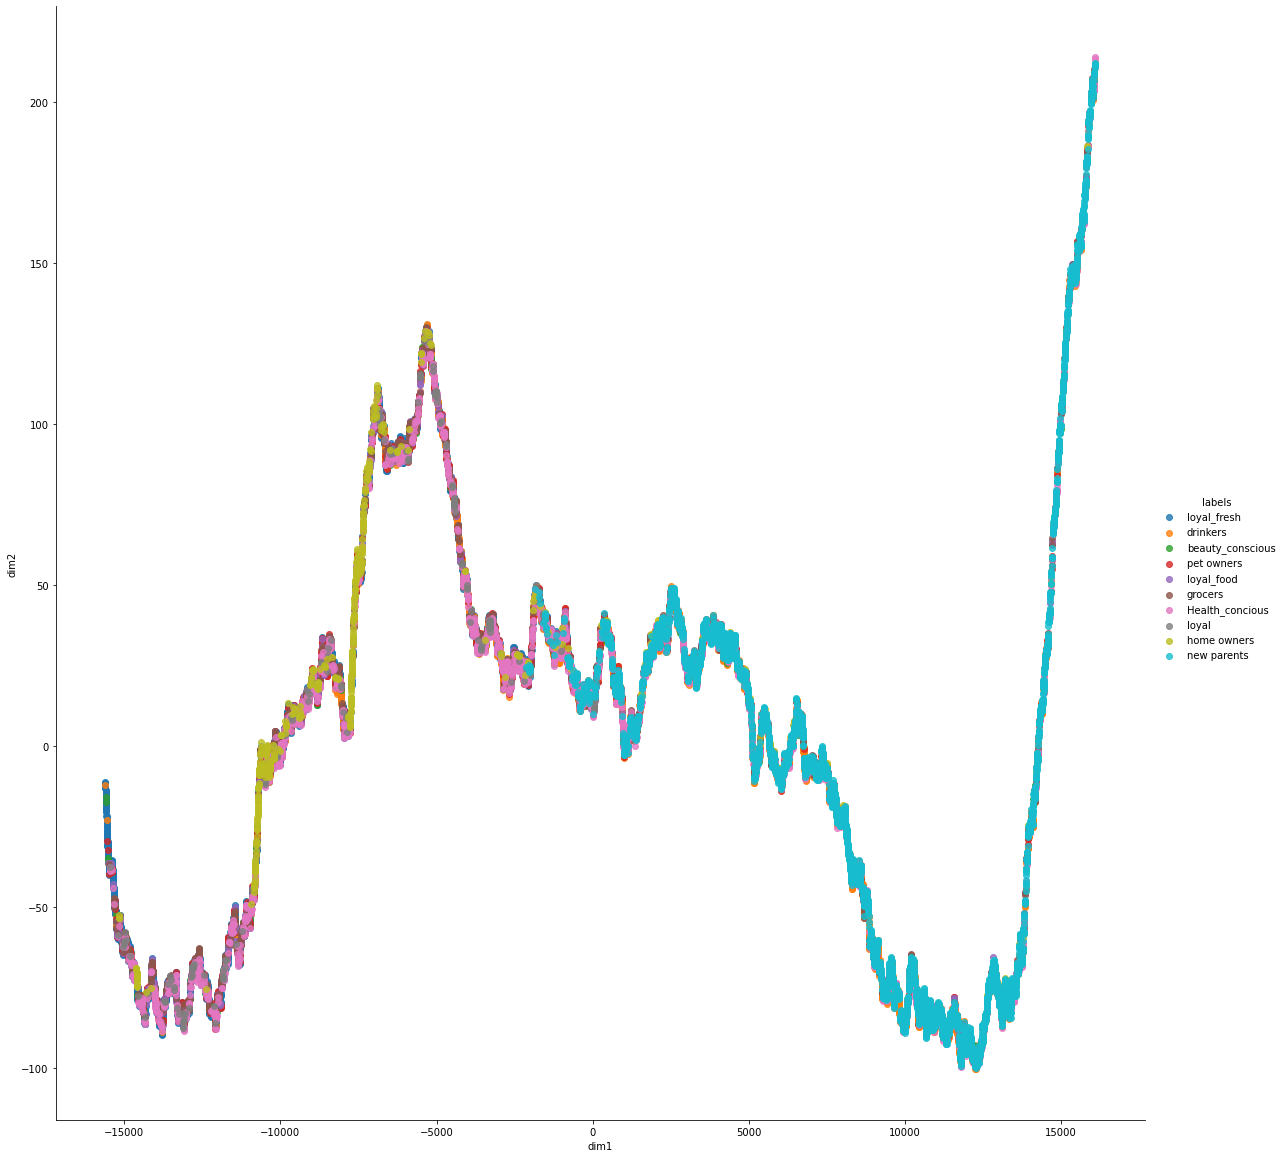

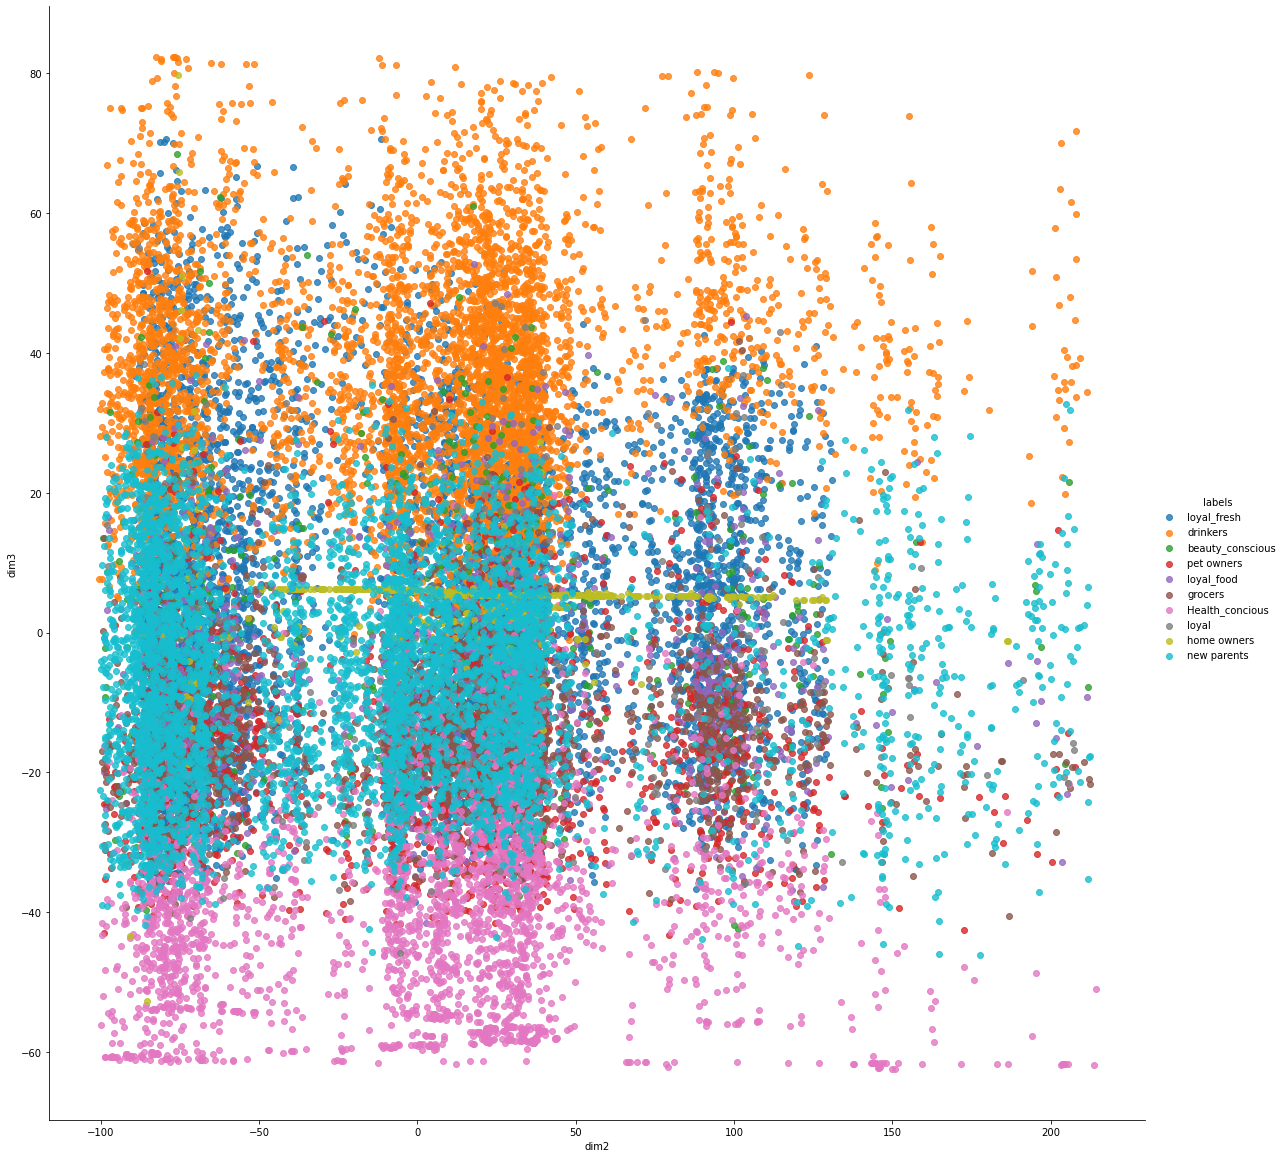

In [73]:
pca_2d_plot_labels(pca, df, frame)

In [74]:
frame.to_csv('order_segmentation_0.0.csv')

In [75]:
frame.groupby('class')['total_items'].describe()

count       mean        std  min   25%   50%   75%    max
class                                                                       
Health_concious   2736.0  23.097222  10.948477  8.0  15.0  21.0  29.0   98.0
beauty_conscious   705.0  26.841135  13.600959  8.0  18.0  24.0  33.0  113.0
drinkers          5238.0  38.236541  17.652329  8.0  26.0  34.0  47.0  117.0
grocers           2396.0  20.247913  10.814796  8.0  12.0  18.0  25.0  110.0
home owners        494.0  46.720648  23.442885  8.0  28.0  46.0  63.0  118.0
loyal              440.0  26.986364  15.064774  8.0  17.0  24.0  33.0  100.0
loyal_food        1089.0  26.970615  13.433149  8.0  18.0  25.0  33.0  105.0
loyal_fresh       6428.0  41.130678  18.737349  8.0  28.0  37.0  50.0  118.0
new parents       5354.0  37.382331  17.642931  8.0  25.0  33.0  45.0  117.0
pet owners        2446.0  26.352003  12.751197  8.0  17.0  24.0  33.0  105.0

In [76]:
frame.groupby('class')['discount%'].describe()

count       mean        std    min       25%      50%  \
class                                                                      
Health_concious   2736.0   5.425048   7.863076 -65.15    0.5400    3.395   
beauty_conscious   705.0   5.717844   8.359051  -5.54    0.8300    2.870   
drinkers          5238.0   4.895857   6.277790   0.00    0.9100    2.860   
grocers           2396.0   8.668823   9.486282 -23.89    1.2000    4.865   
home owners        494.0  94.128664  13.719788  38.45  100.0000  100.000   
loyal              440.0   8.090705   8.996611 -18.06    1.5875    5.590   
loyal_food        1089.0  11.658476  11.797202  -7.81    3.1300    8.000   
loyal_fresh       6428.0   6.703284   7.399177  -5.77    1.8000    4.300   
new parents       5354.0   6.189400   7.157180 -11.99    1.6300    4.000   
pet owners        2446.0  12.952633  10.419447 -23.98    4.8650   11.510   

                       75%     max  
class                               
Health_concious     7.6625   66.14  
beauty_conscious    7.0500   52.49  
drinkers            6.4300   65.10  
grocers            13.9250   50.89  
home owners       100.0000  100.00  
loyal              11.9350   68.14  
loyal_food         15.9800   61.86  
loyal_fresh         8.7725   60.89  
new parents         8.1975   51.90  
pet owners         18.7625   86.09

In [77]:
frame = pd.read_csv('order_segmentation_0.0.csv')

In [78]:
frame['class'].value_counts().sort_values(ascending=False)

loyal_fresh         6428
new parents         5354
drinkers            5238
Health_concious     2736
pet owners          2446
grocers             2396
loyal_food          1089
beauty_conscious     705
home owners          494
loyal                440
Name: class, dtype: int64

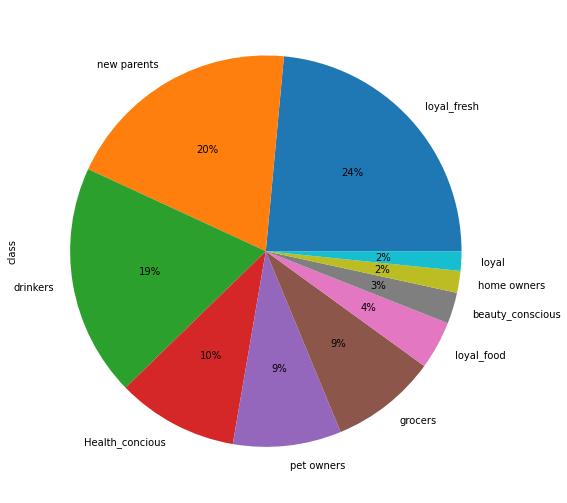

In [79]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

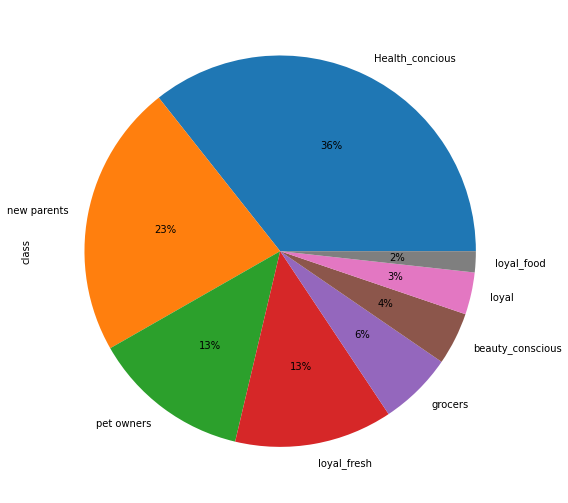

In [80]:
plt.figure(figsize=(9,9))
frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=frame[frame['discount%']<0]['class'].value_counts().sort_values(ascending=False).index)
plt.show()

In [81]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

Unnamed: 0  Unnamed: 0.1      customer         order  total_items  \
count    115.000000    115.000000    115.000000    115.000000   115.000000   
mean   14241.913043  15032.269565   5003.530435  15032.269565    27.286957   
std     8626.606181   9154.396904   3050.538441   9154.396904    18.577842   
min      734.000000    768.000000    199.000000    768.000000     8.000000   
25%     6850.500000   7181.500000   2418.000000   7181.500000    13.000000   
50%    14277.000000  15003.000000   5043.000000  15003.000000    22.000000   
75%    22952.500000  24267.500000   8009.500000  24267.500000    34.500000   
max    27891.000000  29734.000000  10113.000000  29734.000000    86.000000   

        discount%     weekday        hour       Food%      Fresh%     Drinks%  \
count  115.000000  115.000000  115.000000  115.000000  115.000000  115.000000   
mean    -7.733913    3.573913   14.495652   21.090522    0.278348   49.077217   
std     10.908590    2.094524    5.880944   20.662111    2.984948   27.222167   
min    -65.150000    1.000000    0.000000    0.000000    0.000000    4.470000   
25%     -8.245000    2.000000   11.000000    0.000000    0.000000   27.845000   
50%     -4.760000    3.000000   15.000000   17.170000    0.000000   42.910000   
75%     -1.225000    5.000000   19.000000   34.630000    0.000000   68.120000   
max     -0.030000    7.000000   23.000000   78.570000   32.010000  100.000000   

            Home%     Beauty%     Health%       Baby%       Pets%      labels  
count  115.000000  115.000000  115.000000  115.000000  115.000000  115.000000  
mean    16.290696    3.181304    1.593652    6.460783    2.027652    5.339130  
std     17.537937    6.376476    5.254662   18.101412    8.599493    2.571391  
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    3.000000  
50%     10.910000    0.000000    0.000000    0.000000    0.000000    6.000000  
75%     27.930000    3.760000    0.000000    0.000000    0.000000    8.000000  
max     74.670000   37.820000   27.950000   86.000000   67.420000    9.000000

In [82]:
frame[frame['discount%']<0].shape[0]

115